In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Hopfield Recurrent Neural Network

### Objectives

This chapter will discuss the **Hopfield recurrent neural network**—a network that was highly influential in bringing about the resurgence of neural network research in the early 1980s. We will begin with a description of the network, and then we will show how **Lyapunov stability theory** can be used to analyze the network operation. Finally, we will demonstrate how the network can be designed to behave as an **associative memory**.

This chapter brings together many topics discussed in previous chapters:

- **Discrete-time Hopfield network**
- **Eigenvalues and eigenvectors**
- **Associative memory and the Hebb rule**
- **Hessian matrices, conditions for optimality, quadratic functions, and surface and contour plots**
- **Steepest descent and phase plane trajectories**
- **Continuous-time recurrent networks**
- **Lyapunov's Stability Theorem and LaSalle's Invariance Theorem**

This chapter is, in some ways, a culmination of all our previous efforts.

### Lyapunov Stability Theory

To analyze the stability of the Hopfield network, we can use Lyapunov's Stability Theorem, which states that:

$$
\text{If } V(x) \text{ is a Lyapunov function, then:} 
\begin{align*}
V(x) > 0 & \quad \text{for all } x \neq 0 \\
V(0) = 0 & \\
\dot{V}(x) < 0 & \quad \text{for } x \neq 0
\end{align*}
$$

This theorem provides the basis for ensuring that the network converges to a stable equilibrium.

## Associative Memory

The Hopfield network can be designed to function as an associative memory, which is based on the **Hebbian learning rule**:

$$
w_{ij} = \frac{1}{p} \sum_{\mu=1}^{p} \xi_i^{\mu} \xi_j^{\mu}
$$

where $ w_{ij} $ is the weight between neurons $ i $ and $ j $, and $ \xi_i^{\mu} $ represents the stored patterns.

By leveraging these principles, we can implement a robust associative memory mechanism through the Hopfield network.

## Theory and Examples

Much of the resurgence of interest in neural networks during the early 1980s can be attributed to the work of **John Hopfield**. As a well-known Caltech physicist, Hopfield's visibility and scientific credentials lent renewed credibility to the neural network field, which had been tarnished by the hype of the mid-1960s. Early in his career, he studied the interaction between light and solids. Later, he focused on the mechanism of electron transfer between biological molecules. One can imagine that his academic study in physics and mathematics, combined with his later experiences in biology, prepared him uniquely for the conception and presentation of his neural network contributions.

Hopfield wrote two highly influential papers in 1982 [Hopf82] and 1984 [Hopf84]. Many of the ideas in these papers were based on the previous work of other researchers, such as:

- The neuron model of McCulloch and Pitts [McPi43]
- The additive model of Grossberg [Gros67]
- The linear associator of Anderson [Ande72] and Kohonen [Koho72]
- The Brain-State-in-a-Box network of Anderson, Silverstein, Ritz, and Jones [AnSi77]

However, Hopfield's papers are very readable, and they bring together a number of important ideas and present them with clear mathematical analysis, including the application of **Lyapunov stability theory**.

There are several other reasons why Hopfield's papers have had such an impact:

1. He identified a close analogy between his neural network and the **Ising model** of magnetic materials, which is used in statistical physics. This brought a significant amount of existing theory to bear on the analysis of neural networks and encouraged many physicists, as well as other scientists and engineers, to turn their attention to neural network research.

2. Hopfield also had close contacts with **VLSI chip designers** due to his long association with AT&T Bell Laboratories. As early as 1987, Bell Labs had successfully developed neural network chips based on the Hopfield network. One of the main promises of neural networks is their suitability for parallel implementation in VLSI and optical devices. The fact that Hopfield addressed the implementation issues of his networks distinguished him from most previous neural network researchers.

3. Hopfield emphasized practicality, both in the implementation of his networks and in the types of problems they solved. Some of the applications that he described in his early papers include:

   - **Content-addressable memory** (which we will discuss later in this chapter)
   - **Analog-to-digital conversion** [TaHo86]
   - **Optimization** [HoTa85] (as in the traveling salesman problem)

In the next section, we will present the **Hopfield model**. We will use the continuous-time model from the 1984 paper [Hopf84]. Then we will apply **Lyapunov stability theory** and **LaSalle's Invariance Theorem** to the analysis of the Hopfield model. In the final section, we will demonstrate how the **Hebb rule** can be used to design Hopfield networks as content-addressable memories.


## Hopfield Model

In keeping with his practical viewpoint, Hopfield presented his model as an **electrical circuit**. The basic Hopfield model (see [Hopf84]) is shown in Fig.1.

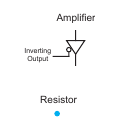


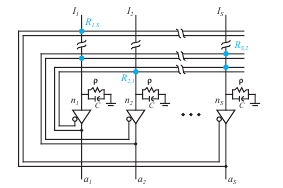

Fig.1 Hopfield Model

Each neuron is represented by an operational amplifier and its associated resistor/capacitor network. There are two sets of inputs to the neurons. The first set, represented by the currents $ I_1, I_2, \ldots $, are constant external inputs. The other set consists of feedback connections from other op-amps. For instance, the second output, $ a_2 $, is fed to resistor $ R_{S,2} $, which is connected, in turn, to the input of amplifier $ S $. Resistors are, of course, only positive, but a negative input to a neuron can be obtained by selecting the inverted output of a particular amplifier. (In Figure 21.1, the inverting output of the first amplifier is connected to the input of the second amplifier through resistor $ R_{2,1} $.)

The equation of operation for the Hopfield model, derived using Kirchhoff's current law, is given by:

$$
C \frac{dn_i(t)}{dt} = \sum_{j=1}^{S} T_{i,j} a_j(t) - \frac{n_i(t)}{R_i} + I_i, \tag{21.1}
$$

where:
- $ n_i $ is the input voltage to the $ i $-th amplifier,
- $ a_i $ is the output voltage of the $ i $-th amplifier,
- $ C $ is the amplifier input capacitance, and
- $ I_i $ is a fixed input current to the $ i $-th amplifier.

The term $ T_{i,j} $ is defined as:

$$
T_{i,j} = \frac{1}{R_i} \left( \frac{1}{R_{i,j}} + \sum_{j=1}^{S} \frac{1}{R_{i,j}} \right), \quad i = f(a_i) \, \text{(or } a_i = f(n_i) \text{)}, \tag{21.2}
$$

where $ f(n) $ is the amplifier characteristic. Here and in what follows, we will assume that the circuit is symmetric, so that $ T_{i,j} = T_{j,i} $.

The amplifier transfer function $ a_i = f(n_i) $ is ordinarily a **sigmoid function**. Both this sigmoid function and its inverse are assumed to be increasing functions. We will provide a specific example of a suitable transfer function later in this chapter.

If we multiply both sides of Eq. (21.1) by $ R_i $, we obtain:

$$
R_i C \frac{dn_i(t)}{dt} = \sum_{j=1}^{S} R_i T_{i,j} a_j(t) - n_i(t) + R_i I_i. \tag{21.3}
$$

This can be transformed into our standard neural network notation if we define:

$$
\epsilon = R_i C, \quad w_{i,j} = R_i T_{i,j}, \quad b_i = R_i I_i. \tag{21.4}
$$

Now, Eq. (21.3) can be rewritten as:

$$
\epsilon \frac{dn_i(t)}{dt} = -n_i(t) + \sum_{j=1}^{S} w_{i,j} a_j(t) + b_i. \tag{21.5}
$$

In vector form, we have:

$$
\frac{dn(t)}{dt} = -n(t) + W a(t) + b, \tag{21.6}
$$

and 

$$
a(t) = f(n(t)). \tag{21.7}
$$

The resulting Hopfield network is displayed in Figure 21.2. Thus, Hopfield's original network of $ S $ operational amplifier circuits can be represented conveniently in our standard network notation. Note that the input vector $ p $ determines the initial network output. This form of the Hopfield network is used for **associative memory networks**, as will be discussed at the end of this chapter.

## Hopfield Model

In the Hopfield model, $ n_i $ is the input voltage to the $ i $-th amplifier, $ a_i $ is the output voltage of the $ i $-th amplifier, $ C $ is the amplifier input capacitance, and $ I_i $ is a fixed input current to the \( i \)-th amplifier. The coupling term $ T_{i,j} $ is defined as:

$$
T_{i,j} = \frac{1}{R_i} \left( \frac{1}{R_{i,j}} + \sum_{j=1}^{S} \frac{1}{R_{i,j}} \right), \tag{21.2}
$$

where $ f(n) $ is the amplifier characteristic. Here and in what follows, we will assume that the circuit is symmetric, so that $ T_{i,j} = T_{j,i} $.

The amplifier transfer function $ a_i = f(n_i) $ is ordinarily a **sigmoid function**. Both this sigmoid function and its inverse are assumed to be increasing functions. We will provide a specific example of a suitable transfer function later in this chapter.

If we multiply both sides of Eq. (21.1) by $ R_i $, we obtain:

$$
R_i C \frac{dn_i(t)}{dt} = \sum_{j=1}^{S} R_i T_{i,j} a_j(t) - n_i(t) + R_i I_i. \tag{21.3}
$$

This can be transformed into our standard neural network notation if we define:

$$
\epsilon = R_i C, \quad w_{i,j} = R_i T_{i,j}, \quad b_i = R_i I_i. \tag{21.4}
$$

Now, Eq. (21.3) can be rewritten as:

$$
\epsilon \frac{dn_i(t)}{dt} = -n_i(t) + \sum_{j=1}^{S} w_{i,j} a_j(t) + b_i. \tag{21.5}
$$

In vector form, we have:

$$
\frac{dn(t)}{dt} = -n(t) + W f(n) + b, \tag{21.6}
$$

and 

$$
a(t) = f(n(t)). \tag{21.7}
$$

The resulting Hopfield network is displayed in Fig.2. Thus, Hopfield's original network of $ S $ operational amplifier circuits can be represented conveniently in our standard network notation. Note that the input vector $ p $ determines the initial network output. This form of the Hopfield network is used for **associative memory networks**, as will be discussed at the end of this chapter.

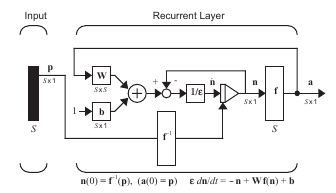

Fig.2 Hopfield Network


### Diagram Representation

The Hopfield network can be represented as follows:

- Input: $ p $
- Recurrent Layer: $ n $
- Output: $ a $

The equation governing the network's dynamics can be illustrated as:

$$
\frac{d n}{dt} = -n + W f(n) + b, \quad n(0) = f^{-1}(p), \quad a(0) = p. \tag{21.8}
$$

Where:
- $ \epsilon $ is a constant related to the amplifier characteristics.
- $ W $ is the weight matrix.
- $ b $ is the bias vector.


Noisy Input:  [ 1  1 -1 -1 -1]
Output Pattern:  [ 1  1  1 -1 -1]


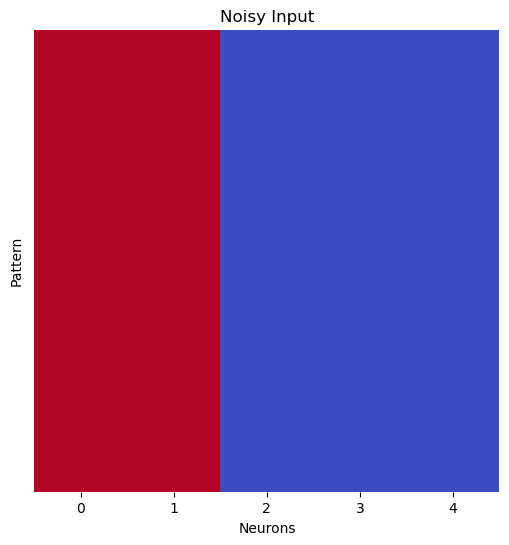

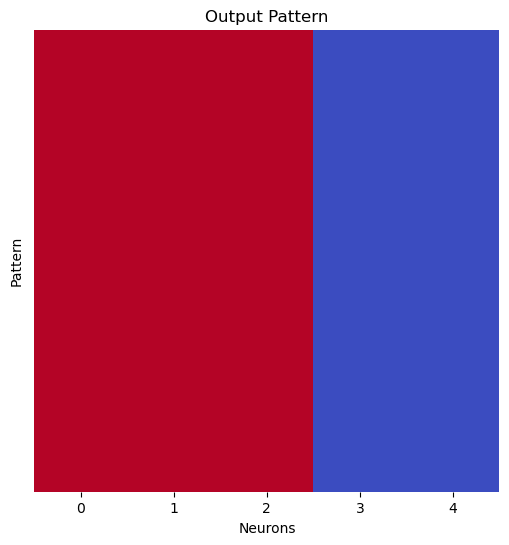

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seed for reproducibility
random.seed(42)

# Hopfield Network Class
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        """Train the network using the given patterns."""
        for p in patterns:
            self.weights += np.outer(p, p)  # Hebbian learning rule
        np.fill_diagonal(self.weights, 0)  # No self-connections

    def predict(self, input_pattern, steps=5):
        """Retrieve the stored pattern from a noisy input."""
        pattern = input_pattern.copy()
        for _ in range(steps):
            for i in range(self.size):
                net_input = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if net_input > 0 else -1
        return pattern

    def display(self, title, pattern):
        """Display the pattern using a heatmap."""
        plt.figure(figsize=(6, 6))
        sns.heatmap(pattern.reshape((1, self.size)), cmap='coolwarm', cbar=False)
        plt.title(title)
        plt.xlabel('Neurons')
        plt.ylabel('Pattern')
        plt.xticks(ticks=np.arange(self.size)+0.5, labels=np.arange(self.size))
        plt.yticks([], [])
        plt.show()

# Example Usage
if __name__ == "__main__":
    # Define patterns for training (each pattern is represented by +1/-1)
    patterns = np.array([[1, 1, 1, -1, -1], 
                         [-1, -1, 1, 1, -1], 
                         [1, -1, 1, -1, 1]])

    # Create a Hopfield network
    hopfield_net = HopfieldNetwork(size=5)

    # Train the network
    hopfield_net.train(patterns)

    # Test the network with a noisy input
    noisy_input = np.array([1, 1, -1, -1, -1])  # Simulating noise
    print("Noisy Input: ", noisy_input)

    # Predict the output from the network
    output = hopfield_net.predict(noisy_input)
    print("Output Pattern: ", output)

    # Display the results
    hopfield_net.display("Noisy Input", noisy_input)
    hopfield_net.display("Output Pattern", output)


Noisy Input:  [1, 1, -1, -1, -1]
Output Pattern:  [1, 1, 1, -1, -1]


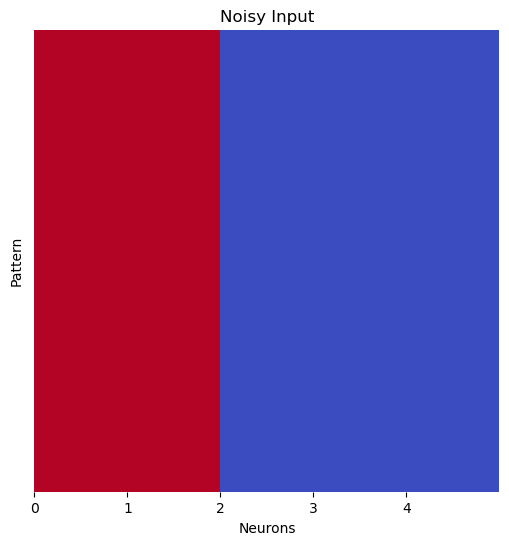

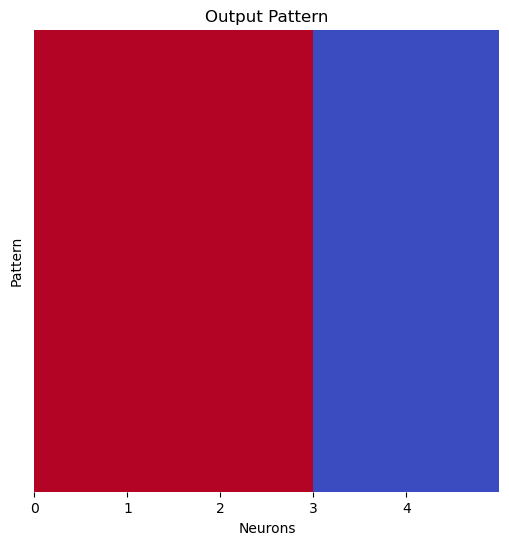

In [2]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Hopfield Network Class
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = [[0 for _ in range(size)] for _ in range(size)]

    def train(self, patterns):
        """Train the network using the given patterns."""
        for p in patterns:
            for i in range(self.size):
                for j in range(self.size):
                    if i != j:  # No self-connections
                        self.weights[i][j] += p[i] * p[j]

    def predict(self, input_pattern, steps=5):
        """Retrieve the stored pattern from a noisy input."""
        pattern = input_pattern.copy()
        for _ in range(steps):
            for i in range(self.size):
                net_input = sum(self.weights[i][j] * pattern[j] for j in range(self.size))
                pattern[i] = 1 if net_input > 0 else -1
        return pattern

    def display(self, title, pattern):
        """Display the pattern using a heatmap."""
        plt.figure(figsize=(6, 6))
        sns.heatmap([[p for p in pattern]], cmap='coolwarm', cbar=False)
        plt.title(title)
        plt.xlabel('Neurons')
        plt.ylabel('Pattern')
        plt.xticks(ticks=range(self.size), labels=range(self.size))
        plt.yticks([], [])
        plt.show()

# Example Usage
if __name__ == "__main__":
    # Define patterns for training (each pattern is represented by +1/-1)
    patterns = [[1, 1, 1, -1, -1],
                [-1, -1, 1, 1, -1],
                [1, -1, 1, -1, 1]]

    # Create a Hopfield network
    hopfield_net = HopfieldNetwork(size=5)

    # Train the network
    hopfield_net.train(patterns)

    # Test the network with a noisy input
    noisy_input = [1, 1, -1, -1, -1]  # Simulating noise
    print("Noisy Input: ", noisy_input)

    # Predict the output from the network
    output = hopfield_net.predict(noisy_input)
    print("Output Pattern: ", output)

    # Display the results
    hopfield_net.display("Noisy Input", noisy_input)
    hopfield_net.display("Output Pattern", output)


## Lyapunov Function

The application of Lyapunov stability theory to the analysis of recurrent networks was one of the key contributions of Hopfield. Cohen and Grossberg also used Lyapunov theory for the analysis of competitive networks at about the same time \cite{CoGr83}. In this section, we will demonstrate how LaSalle's Invariance Theorem, which was presented in Chapter 20, can be used with the Hopfield network.

The first step in using LaSalle's theorem is to choose a Lyapunov function. Hopfield suggested the following function:

$$
V(a) = -\frac{1}{2} a^T W a + \sum_{i=1}^{S} \int_{0}^{a_i} f(u) \, du - b^T a
$$

Notice that the first and third terms make up a quadratic function. In a later section of this chapter, we will use our previous results on quadratic functions to help develop some insight into this Lyapunov function.

To use LaSalle's theorem, we will need to evaluate the derivative of \(V(a)\). For clarity, we will consider each of the three terms of \(V(a)\) separately. Using the derivative properties, the derivative of the first term is:

$$
\frac{d}{dt}\left(-\frac{1}{2} a^T W a\right) = -\frac{1}{2} \nabla\left(a^T W a\right) \cdot \frac{da}{dt} = -a^T W \frac{da}{dt}
$$

The second term in \(V(a)\) consists of a sum of integrals. If we consider one of these integrals, we find:

$$
\frac{d}{dt}\left(\int_{0}^{a_i} f(u) \, du\right) = f^{-1}(a_i) \frac{da_i}{dt} = n_i \frac{da_i}{dt}
$$

The total derivative of the second term in \(V(a)\) is then:

$$
\frac{d}{dt} \sum_{i=1}^{S} \int_{0}^{a_i} f(u) \, du = \sum_{i=1}^{S} n_i \frac{da_i}{dt}
$$

Using the appropriate equations, we can find the derivative of the third term in \(V(a)\):

$$
\frac{d}{dt}(-b^T a) = -\nabla(b^T a) \cdot \frac{da}{dt} = -b \frac{da}{dt}
$$

Therefore, the total derivative of \(V(a)\) is:

$$
\frac{dV(a)}{dt} = -a^T W \frac{da}{dt} + \sum_{i=1}^{S} n_i \frac{da_i}{dt} - b \frac{da}{dt} = \left[-a^T W + n - b\right] \frac{da}{dt}
$$

From Eq. (21.6) we know that:

$$
\frac{dn(t)}{dt} = -\frac{1}{\epsilon} \frac{dV(a)}{dt}
$$

This allows us to rewrite the expression for the derivative of \(V(a)\):

$$
\frac{dV(a)}{dt} = -\epsilon \sum_{i=1}^{S} \left(\frac{d n_i}{dt}\right)
$$

Since \(n_i = f(a_i)\), we can expand the derivative of \(n_i\) as follows:

$$
\frac{dn_i}{dt} = \frac{df(a_i)}{da_i} \frac{da_i}{dt}
$$

Now, the expression can be rewritten as:

$$
\frac{dV(a)}{dt} = -\epsilon \sum_{i=1}^{S} \left(\frac{df(a_i)}{da_i} \frac{da_i}{dt}\right)
$$

If we assume that \(f(a_i)\) is an increasing function, as it would be for an operational amplifier, then:

$$
\frac{d}{da_i} f(a_i) > 0
$$

From the previous equation, this implies that:

$$
\frac{dV(a)}{dt} \leq 0
$$

Thus, if \(f(a_i)\) is an increasing function, \(\frac{dV(a)}{dt}\) is a negative semidefinite function. Therefore, \(V(a)\) is a valid Lyapunov function.


In [3]:
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = [[0 for _ in range(size)] for _ in range(size)]

    def train(self, patterns):
        """Train the network on the provided patterns."""
        for pattern in patterns:
            for i in range(self.size):
                for j in range(self.size):
                    if i != j:
                        self.weights[i][j] += pattern[i] * pattern[j]

    def recall(self, pattern, steps=5):
        """Recall a pattern based on the initial input."""
        # Initialize the state with the input pattern
        state = pattern[:]
        for step in range(steps):
            new_state = state[:]
            for i in range(self.size):
                # Calculate the net input for neuron i
                net_input = sum(self.weights[i][j] * state[j] for j in range(self.size))
                # Activation function: sign function (Heaviside step function)
                new_state[i] = 1 if net_input > 0 else -1
            state = new_state
        return state

    def print_weights(self):
        """Print the weights matrix."""
        for row in self.weights:
            print(row)

# Example usage
if __name__ == "__main__":
    # Create a Hopfield network of size 4
    hopfield_net = HopfieldNetwork(size=4)

    # Define patterns to train the network (e.g., +1 and -1 representing binary states)
    patterns = [
        [1, 1, -1, -1],
        [1, -1, 1, -1],
        [-1, 1, 1, -1]
    ]

    # Train the Hopfield network with the defined patterns
    hopfield_net.train(patterns)

    # Print the weights of the network
    print("Weights matrix after training:")
    hopfield_net.print_weights()

    # Recall a pattern
    initial_pattern = [1, 1, -1, -1]  # Example initial state
    recalled_pattern = hopfield_net.recall(initial_pattern)

    print(f"Recalled pattern: {recalled_pattern}")


Weights matrix after training:
[0, -1, -1, -1]
[-1, 0, -1, -1]
[-1, -1, 0, -1]
[-1, -1, -1, 0]
Recalled pattern: [1, 1, -1, -1]


Weights matrix after training:
[0, -1, -1, -1]
[-1, 0, -1, -1]
[-1, -1, 0, -1]
[-1, -1, -1, 0]
Recalled pattern: [1, 1, -1, -1]


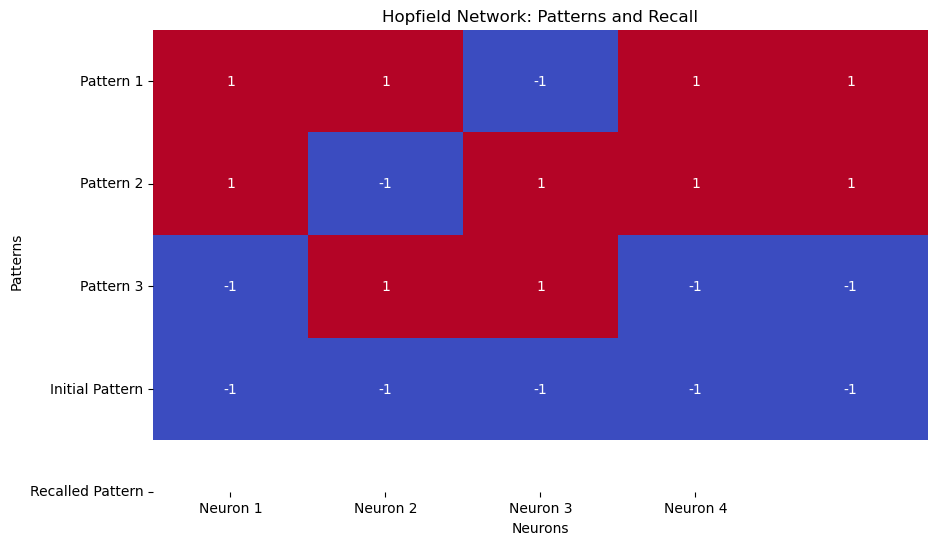

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = [[0 for _ in range(size)] for _ in range(size)]

    def train(self, patterns):
        """Train the network on the provided patterns."""
        for pattern in patterns:
            for i in range(self.size):
                for j in range(self.size):
                    if i != j:
                        self.weights[i][j] += pattern[i] * pattern[j]

    def recall(self, pattern, steps=5):
        """Recall a pattern based on the initial input."""
        # Initialize the state with the input pattern
        state = pattern[:]
        for step in range(steps):
            new_state = state[:]
            for i in range(self.size):
                # Calculate the net input for neuron i
                net_input = sum(self.weights[i][j] * state[j] for j in range(self.size))
                # Activation function: sign function (Heaviside step function)
                new_state[i] = 1 if net_input > 0 else -1
            state = new_state
        return state

    def print_weights(self):
        """Print the weights matrix."""
        for row in self.weights:
            print(row)

# Example usage
if __name__ == "__main__":
    # Create a Hopfield network of size 4
    hopfield_net = HopfieldNetwork(size=4)

    # Define patterns to train the network (e.g., +1 and -1 representing binary states)
    patterns = [
        [1, 1, -1, -1],
        [1, -1, 1, -1],
        [-1, 1, 1, -1]
    ]

    # Train the Hopfield network with the defined patterns
    hopfield_net.train(patterns)

    # Print the weights of the network
    print("Weights matrix after training:")
    hopfield_net.print_weights()

    # Recall a pattern
    initial_pattern = [1, 1, -1, -1]  # Example initial state
    recalled_pattern = hopfield_net.recall(initial_pattern)

    print(f"Recalled pattern: {recalled_pattern}")

    # Prepare data for plotting
    patterns.append(initial_pattern)  # Add initial pattern for comparison
    patterns.append(recalled_pattern)   # Add recalled pattern

    # Create a DataFrame for Seaborn plotting
    data = {
        'Pattern': ['Pattern 1', 'Pattern 2', 'Pattern 3', 'Initial Pattern', 'Recalled Pattern'],
        'Neuron 1': [patterns[0][0], patterns[1][0], patterns[2][0], initial_pattern[0], recalled_pattern[0]],
        'Neuron 2': [patterns[0][1], patterns[1][1], patterns[2][1], initial_pattern[1], recalled_pattern[1]],
        'Neuron 3': [patterns[0][2], patterns[1][2], patterns[2][2], initial_pattern[2], recalled_pattern[2]],
        'Neuron 4': [patterns[0][3], patterns[1][3], patterns[2][3], initial_pattern[3], recalled_pattern[3]],
    }

    # Plotting using Seaborn
    plt.figure(figsize=(10, 6))
    sns.heatmap([data['Neuron 1'], data['Neuron 2'], data['Neuron 3'], data['Neuron 4']],
                annot=True, fmt='d', cmap='coolwarm', cbar=False,
                xticklabels=['Neuron 1', 'Neuron 2', 'Neuron 3', 'Neuron 4'],
                yticklabels=data['Pattern'])
    plt.title('Hopfield Network: Patterns and Recall')
    plt.xlabel('Neurons')
    plt.ylabel('Patterns')
    plt.show()


## Invariant Sets

Now we want to apply LaSalle's Invariance Theorem to determine equilibrium points for the Hopfield network. The first step is to find the set $ Z $ (Eq. (20.19)):

$$
Z = \{ a : \frac{dV(a)}{dt} = 0, \, a \in \text{closure of } G \}
$$

This set includes all points at which the derivative of the Lyapunov function is zero. For now, let's assume that $ G $ is all of $ \mathbb{R} $. We can see from Eq. (21.17) that such derivatives will be zero if the derivatives of all of the neuron outputs are zero:

$$
\frac{da}{dt} = 0
$$

However, when the derivatives of the outputs are zero, the circuit is at equilibrium. Thus, those points where the system "energy" is not changing are also points where the circuit is at equilibrium. This means that the set $ L $, the largest invariant set in $ Z $, is exactly equal to $ Z $:

$$
L = Z
$$

Thus, all points in $ Z $ are potential attractors. Some of these features will be illustrated in the following example.

### Example

Consider the following example from Hopfield's original paper \([Hopf84]\). We will examine a system having an amplifier characteristic:

$$
a = f(n) = \frac{2}{\pi} \tan\left(\frac{\pi n}{2}\right)
$$

We can also write this expression as:

$$
2\pi n = \gamma \tan\left(\frac{\pi a}{2}\right)
$$

Assume two amplifiers, with the output of each connected to the input of the other through a unit resistor, so that:

$$
R_{1,2} = R_{2,1} = 1 \quad \text{and} \quad T_{1,2} = T_{2,1} = 1
$$

Thus we have a weight matrix $ W $:

$$
W = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

If the amplifier input capacitance is also set to 1, we have:

$$
\epsilon = R_i C = 1
$$

Let us also take $ \gamma = 1.4 $ and $ I_1 = I_2 = 0 $. Therefore:

$$
b = 0
$$

Recall from Eq. (21.8) that the Lyapunov function is:

$$
V(a) = -\frac{1}{2} a^T W a - b a
$$

The first term of the Lyapunov function, for this example, is:

$$
\frac{1}{2} a^T W a = -\frac{1}{2} a_1 a_2
$$


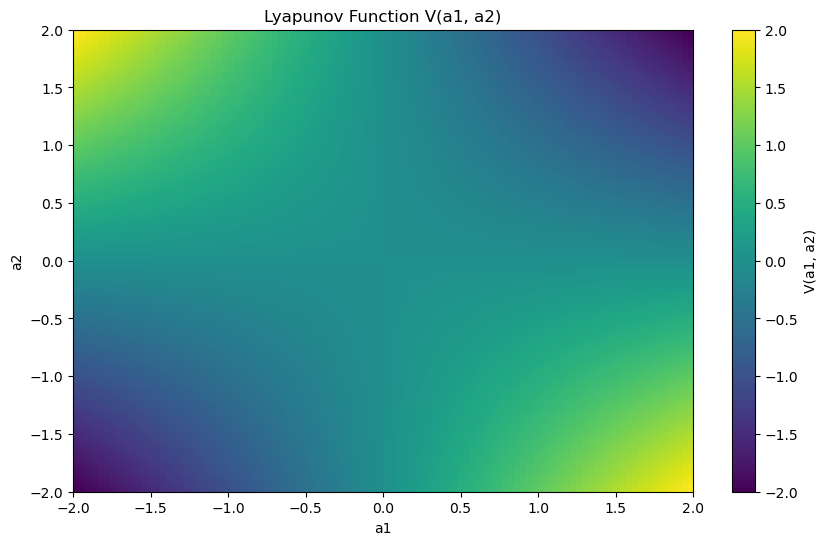

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the amplifier characteristic function
def f(n, gamma=1.4):
    return (2 / np.pi) * np.tan((np.pi * n) / 2)

# Define the Lyapunov function
def lyapunov_function(a1, a2):
    # Assuming W is the weight matrix with symmetric connections
    W = np.array([[0, 1], [1, 0]])
    V = -0.5 * (a1 * a2)  # First term of the Lyapunov function
    return V

# Generate input data for a1 and a2
a1_values = np.linspace(-2, 2, 100)
a2_values = np.linspace(-2, 2, 100)
A1, A2 = np.meshgrid(a1_values, a2_values)

# Compute the Lyapunov function values
V_values = lyapunov_function(A1, A2)

# Set up the plot
plt.figure(figsize=(10, 6))
# Use imshow to display the Lyapunov function values
plt.imshow(V_values, extent=(-2, 2, -2, 2), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='V(a1, a2)')
plt.title('Lyapunov Function V(a1, a2)')
plt.xlabel('a1')
plt.ylabel('a2')
plt.show()


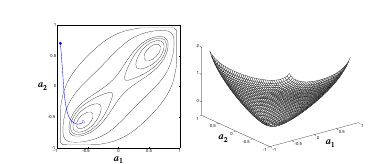

Fig.3 Hopfield Example Lyapunov Function and Trajectory


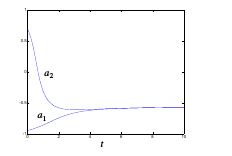

Fig.4 Hopfield Example Time Response

## Lyapunov Function Derivation

The third term is zero because the biases are zero. The \(i\)-th part of the second term is given by:

$$
\int_{-1}^{0} f(u) \, du = \frac{2\pi}{\gamma \pi} \int_{-1}^{0} -\tan\left(\frac{\pi}{2} u\right) \, du = -\frac{2}{\gamma \pi} \log\left(\cos\left(\frac{\pi}{2} u\right)\right) \bigg|_{-1}^{0} = -\frac{2}{\gamma \pi} \left( \log(1) - \log\left(\cos\left(-\frac{\pi}{2}\right)\right) \right) = -\frac{2}{\gamma \pi} \cdot 0 = 0
$$

This expression can be simplified to:

$$
a_i \int_{0}^{-1} f^{-1}(u) \, du = -\frac{4}{\gamma \pi} \log\left(\cos\left(\frac{a_i}{2}\right)\right)
$$

Finally, substituting all three terms into Eq. (21.29), we have our Lyapunov function:

$$
V(a) = -a_1 a_2 - \frac{4}{\gamma \pi} \log\left(\cos\left(\frac{a_1}{2}\right)\right) + \frac{4}{\gamma \pi} \log\left(\cos\left(\frac{a_2}{2}\right)\right)
$$

### Network Equation

Now let’s write out the network equation (Eq. (21.6)). With \(\epsilon = 1\) and \(b = 0\), it is given by:

$$
\frac{dn}{dt} = -n + Wf(n) = -n + Wa
$$

If we substitute the weight matrix \(W\):

$$
W = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

this expression can be written as the following pair of equations:

$$
\frac{dn_1}{dt} = a_2 - n_1,
$$

$$
\frac{dn_2}{dt} = a_1 - n_2.
$$

### Neuron Outputs

The neuron outputs are:

$$
a_1 = \frac{2}{\pi} \tan\left(\frac{1.4\pi}{2} n_1\right),
$$

$$
a_2 = \frac{2}{\pi} \tan\left(\frac{1.4\pi}{2} n_2\right).
$$

### Lyapunov Function Contours and Trajectory

The contour lines in Fig.3 represent constant values of the Lyapunov function. The system has two attractors, one in the lower left and one in the upper right. Starting from the upper left, the system converges, as shown by the blue line, to the stable point at the lower left.

### Time Response

Fig.4 displays the time response of the two neuron outputs:

$$
\begin{align*}
t: & \quad 0 \quad 2 \quad 4 \quad 6 \quad 8 \quad 10 \\
a_1: & \quad 1 \quad 0.5 \quad 0 \quad -0.5 \quad -1 \\
a_2: & \quad 0 \quad 0.5 \quad 1 \quad 1.5 \quad 2
\end{align*}
$$

Fig.5 displays the time response of the Lyapunov function. As expected, it decreases continuously as the equilibrium point is approached. The system also has an equilibrium point at the origin. If the network is initialized anywhere on a diagonal line drawn from the upper-left corner to the lower-right corner, the solution converges to the origin. Any initial conditions that do not fall on this line, however, will converge to one of the solutions in the lower-left or upper-right corner. The solution at the origin is a saddle point of the Lyapunov function, not a local minimum.


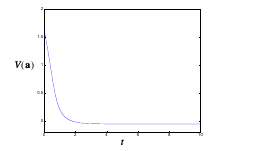

Fig.5 Lyapunov Function Response

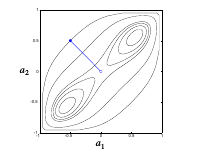

Fig.6 Hopfield Convergence to a Saddle Point

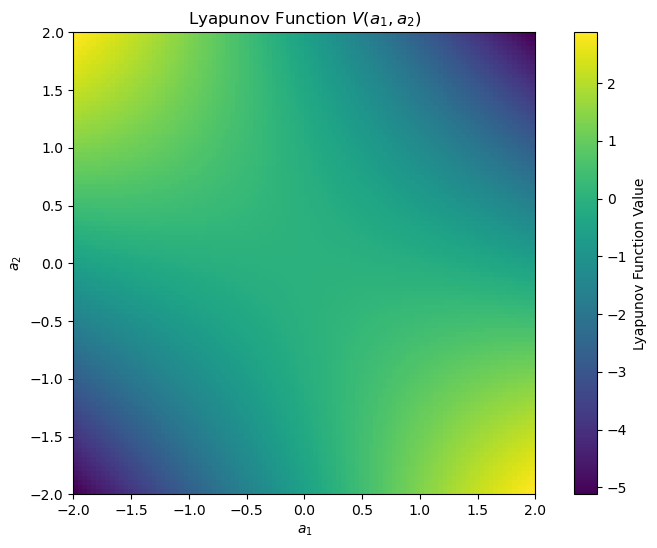

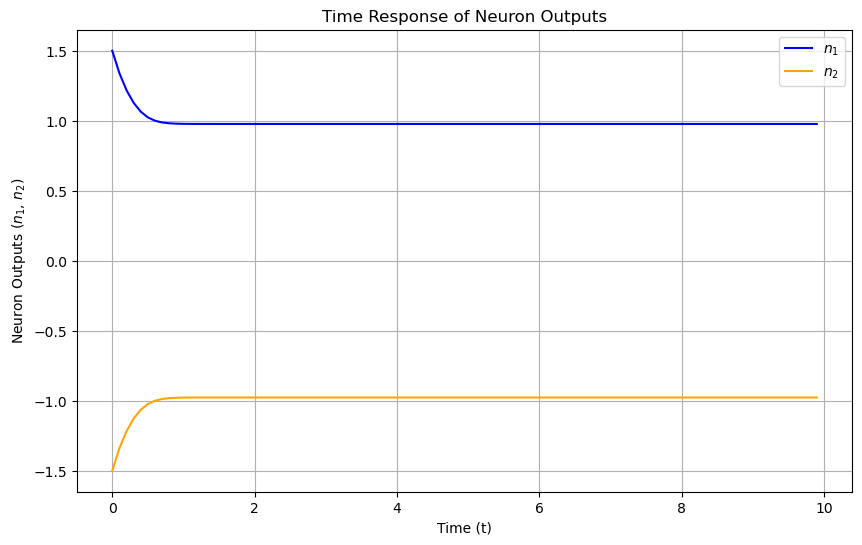

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
gamma = 1.4
num_points = 100
a1_range = np.linspace(-2, 2, num_points)
a2_range = np.linspace(-2, 2, num_points)

# Calculate the Lyapunov function V(a1, a2)
def lyapunov_function(a1, a2):
    term1 = -a1 * a2
    term2 = (4 / (gamma * np.pi)) * (np.log(np.abs(np.cos(a1 / 2))) + np.log(np.abs(np.cos(a2 / 2))))
    return term1 + term2

# Create a meshgrid for a1 and a2
A1, A2 = np.meshgrid(a1_range, a2_range)
V_values = lyapunov_function(A1, A2)

# Set up the plot for the Lyapunov function using imshow
plt.figure(figsize=(10, 6))
plt.imshow(V_values, extent=(-2, 2, -2, 2), origin='lower', cmap='viridis')
plt.colorbar(label='Lyapunov Function Value')
plt.title('Lyapunov Function $V(a_1, a_2)$')
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.show()

# Define the network dynamics
def network_dynamics(n1, n2):
    a1 = (2 / np.pi) * np.tan((gamma * np.pi / 2) * n1)
    a2 = (2 / np.pi) * np.tan((gamma * np.pi / 2) * n2)
    dn1_dt = a2 - n1
    dn2_dt = a1 - n2
    return dn1_dt, dn2_dt

# Simulate the dynamics
timesteps = 100
dt = 0.1
n1_values = np.zeros(timesteps)
n2_values = np.zeros(timesteps)

# Initial conditions
n1_values[0] = 1.5
n2_values[0] = -1.5

for t in range(1, timesteps):
    dn1, dn2 = network_dynamics(n1_values[t-1], n2_values[t-1])
    n1_values[t] = n1_values[t-1] + dn1 * dt
    n2_values[t] = n2_values[t-1] + dn2 * dt

# Set up the plot for the time response
plt.figure(figsize=(10, 6))
plt.plot(np.arange(timesteps) * dt, n1_values, label='$n_1$', color='blue')
plt.plot(np.arange(timesteps) * dt, n2_values, label='$n_2$', color='orange')
plt.title('Time Response of Neuron Outputs')
plt.xlabel('Time (t)')
plt.ylabel('Neuron Outputs ($n_1$, $n_2$)')
plt.legend()
plt.grid()
plt.show()


## Hopfield Attractors

In the example network in the previous section, we found that the Hopfield network attractors were stationary points of the Lyapunov function. Now we want to show that this is true in the general case. Recall from Eq. (21.21) that the potential attractors of the Hopfield network satisfy:

$$
\frac{da}{dt} = 0. \tag{21.39}
$$

How are these points related to the minima of the Lyapunov function $ V(a) $?

In Chapter 8 (Eq. (8.27)), we showed that the minima of a function must be stationary points (i.e., gradient equal to zero). The stationary points of $ V(a) $ will satisfy:

$$
\nabla V = \left(\frac{\partial V}{\partial a_1}, \frac{\partial V}{\partial a_2}, \ldots, \frac{\partial V}{\partial a_S}\right) = 0, \tag{21.40}
$$

where

$$
V(a) = -\frac{1}{2} \sum_{i=1}^{S} a_i^T W a + \left(\int_0^f(u) du\right) - b a. \tag{21.41}
$$

If we follow steps similar to those we used to derive Eq. (21.13), we can find the following expression for the gradient:

$$
\nabla V(a) = \left[-W a + n - b\right] = -\epsilon \frac{dn(t)}{dt}. \tag{21.42}
$$

The $ i $-th element of the gradient is therefore:

$$
\frac{\partial V(a)}{\partial a_i} = -\epsilon \left[\frac{d n}{dt}\left(f(a_i)\right)\right] = -\epsilon \left(f(a_i)\right). \tag{21.43}
$$

Notice, incidentally, that if $ f(a) $ is linear, Eq. (21.43) implies that:

$$
\frac{da}{dt} = -\alpha \nabla V(a). \tag{21.44}
$$

Therefore, the response of the Hopfield network is steepest descent. Thus, if you are in a region where $ f(a) $ is approximately linear, the network solution approximates steepest descent.

We have assumed that the transfer function and its inverse are monotonic increasing functions. Therefore,

$$
\frac{d^{-1}[f(a_i)]}{da_i} > 0. \tag{21.45}
$$

From Eq. (21.43), this implies that those points for which:

$$
\frac{da(t)}{dt} = 0, \tag{21.46}
$$

will also be points where:

$$
\nabla V(a) = 0. \tag{21.47}
$$

Therefore, the attractors, which are members of the set $ L $ and satisfy Eq. (21.39), will also be stationary points of the Lyapunov function $ V(a) $.


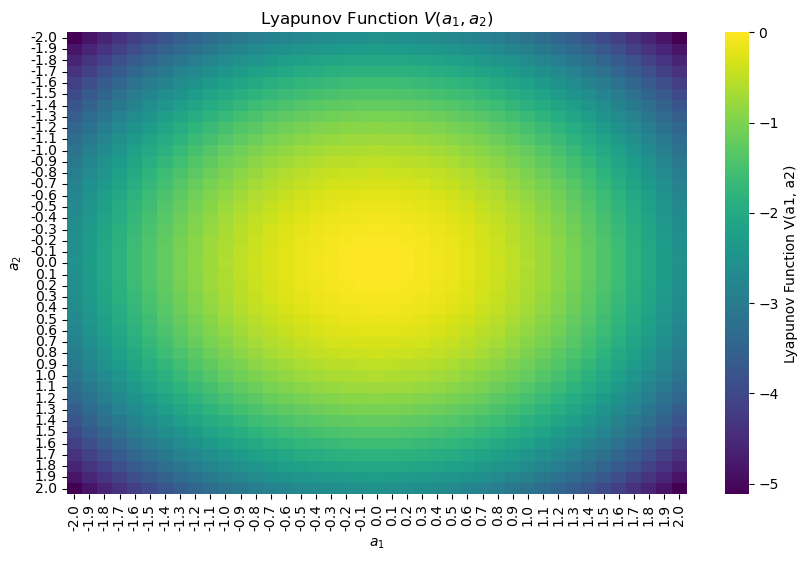

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define the Lyapunov function
def lyapunov_function(a1, a2):
    term1 = -0.5 * (a1 ** 2 + a2 ** 2)
    term2 = (4 / (1.4 * math.pi)) * (math.log(math.cos(a1 / 2)) + math.log(math.cos(a2 / 2)))
    return term1 + term2

# Generate values for a1 and a2
a1_values = [x * 0.1 for x in range(-20, 21)]  # Values from -2 to 2
a2_values = [y * 0.1 for y in range(-20, 21)]  # Values from -2 to 2

# Calculate the Lyapunov function values
V_values = []
for a1 in a1_values:
    row = []
    for a2 in a2_values:
        row.append(lyapunov_function(a1, a2))
    V_values.append(row)

# Set up the plot for the Lyapunov function
plt.figure(figsize=(10, 6))
sns.heatmap(V_values, cmap='viridis', cbar=True,
            xticklabels=[f'{a1:.1f}' for a1 in a1_values],
            yticklabels=[f'{a2:.1f}' for a2 in a2_values],
            cbar_kws={'label': 'Lyapunov Function V(a1, a2)'})

plt.title('Lyapunov Function $V(a_1, a_2)$')
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.show()


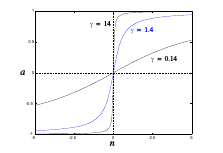

Fig.7 Inverse Tangent Amplifier Characteristic

## Effect of Gain on Hopfield Lyapunov Function

The Hopfield Lyapunov function can be simplified in cases where the amplifier gain $ \gamma $ is large. Recall that the nonlinear amplifier characteristic for our previous example was:

$$
a_i = f(n) = \frac{2}{\pi} \gamma n \tan\left(\frac{\pi n}{2}\right) \quad (21.48)
$$

This function is displayed in Fig.7 for four different gain values:

- $ \gamma = 14 $
- $ \gamma = 1.4 $
- $ \gamma = 0.5 $
- $ \gamma = 0.14 $

The inverse tangent amplifier characteristic is depicted as follows:

$$
\begin{array}{c|c}
\text{Gain } \gamma & \text{Characteristic} \\
\hline
\gamma = 14 & \text{Steepest curve at the origin} \\
\gamma = 1.4 & \text{Moderate steepness} \\
\gamma = 0.5 & \text{Flatter curve} \\
\gamma = 0.14 & \text{Very flat curve} \\
\end{array}
$$

As $ \gamma $ increases, the slope of the curve at the origin increases. As $ \gamma $ approaches infinity, $ f(n) $ approximates a signum (step) function.

Now recall from Eq. (21.8) that the general Lyapunov function is defined as:

$$
V(a) = -\frac{1}{2} a^T W a + \sum_{i=1}^{S} \left( -\int_0^{a_i} f(u) \, du - b a_i \right) \quad (21.49)
$$

In this context, the effect of the amplifier gain $ \gamma $ significantly influences the behavior of the Lyapunov function, affecting stability and convergence in the Hopfield network.


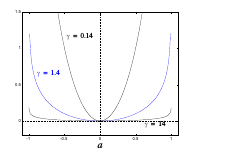

Fig.8 Second Term in the Lyapunov Function

## Understanding the Hopfield Network Through Quadratic Functions

This is an important development, as we can now apply our results from Chapter 8 on quadratic functions to the understanding of Hopfield networks. Recall that the shape of the surface of a quadratic function is determined by the eigenvalues and eigenvectors of its Hessian matrix. 

The Hessian matrix for our example Lyapunov function is given by:

$$
\nabla^2 V(a) = -W = \begin{pmatrix}
0 & -1 \\
-1 & 0
\end{pmatrix} \quad (21.55)
$$

The eigenvalues of this Hessian matrix are computed as follows:

$$
\nabla^2 V(a) - \lambda I = \begin{pmatrix}
-\lambda & -1 \\
-1 & -\lambda
\end{pmatrix} = 0
$$

Solving the characteristic equation, we have:

$$
\begin{vmatrix}
-\lambda & -1 \\
-1 & -\lambda
\end{vmatrix} = \lambda^2 - 1 = (\lambda + 1)(\lambda - 1) \quad (21.56)
$$

Thus, the eigenvalues are:

$$
\lambda_1 = -1 \quad \text{and} \quad \lambda_2 = 1
$$

It follows that the eigenvectors are:

$$
z_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix} \quad \text{and} \quad z_2 = \begin{pmatrix} 1 \\ -1 \end{pmatrix} \quad (21.57)
$$

### Surface of the High-Gain Lyapunov Function

The surface of the high-gain Lyapunov function can be analyzed based on the eigenvalues. Since the Hessian matrix has one positive and one negative eigenvalue, we have a saddle point condition. The surface will exhibit:

- Negative curvature along the first eigenvector.
- Positive curvature along the second eigenvector.

The surface is depicted in Fig.9. Notably, the function does not have a minimum. However, the network is constrained to the hypercube:

$$
\{ a : -1 < a_i < 1 \} \quad (21.58)
$$

Thus, there will be constrained minima at the corners of the hypercube $ a = 1 $ and $ a = -1 $.

When the gain is very small, there is a single minimum at the origin (see Exercise E21.1). As the gain increases, the two minima move from the origin toward the corners given by Eq. (21.58). 

In Fig.3, which displays an intermediate case with $ \gamma = 1.4 $, the minima occur at:

$$
a = 0.57 \quad \text{and} \quad a = -0.57 \quad (21.59)
$$

In the general case, where there are more than two neurons in the network, the high-gain minima will fall in certain corners of the hypercube $ \{ a : -1 < a_i < 1 \} $. We will discuss the general case in more detail in later sections after describing the Hopfield design process.


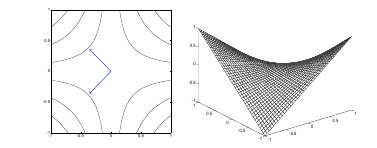

Fig.9 Example High Gain Lyapunov Function

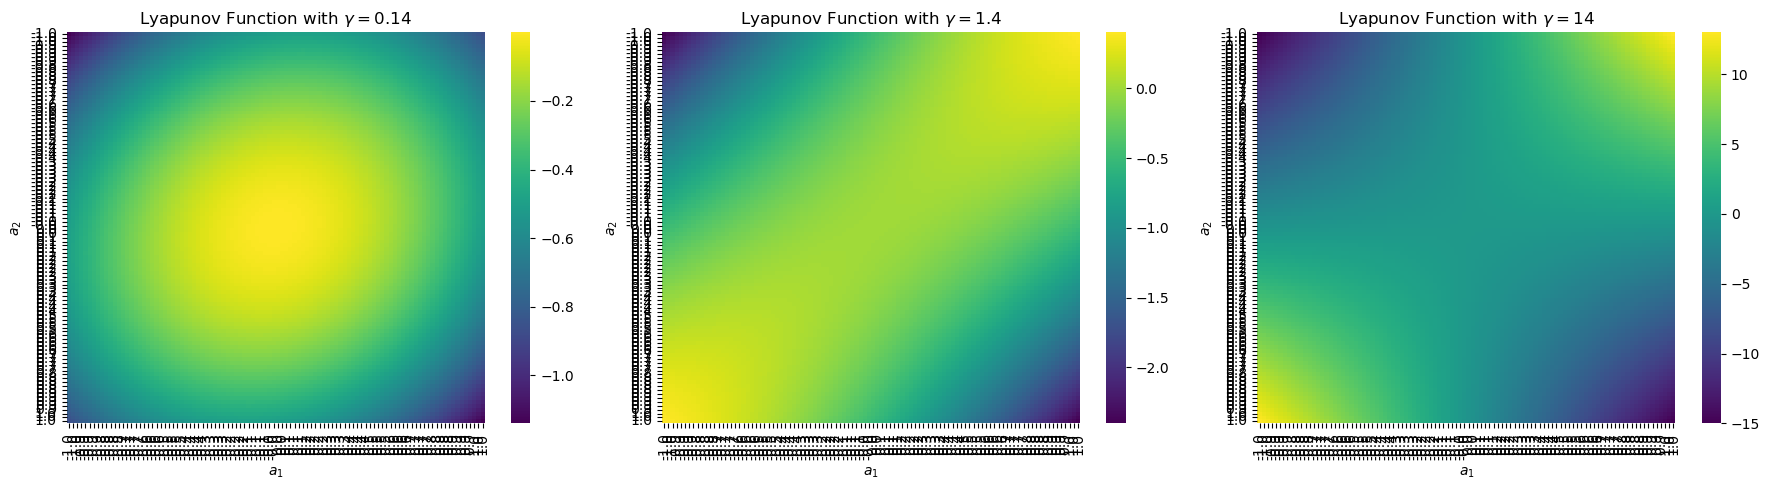

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameters
gamma_values = [0.14, 1.4, 14]  # Different gain values
n = 100  # Number of points in each dimension
a_values = [-1, 1]  # Range of a

# Create a mesh grid for a1 and a2
a1 = [a_values[0] + (a_values[1] - a_values[0]) * i / (n - 1) for i in range(n)]
a2 = [a_values[0] + (a_values[1] - a_values[0]) * i / (n - 1) for i in range(n)]

# Calculate Lyapunov function for each gain
def lyapunov_function(a1, a2, gamma):
    V = []
    for a1_val in a1:
        row = []
        for a2_val in a2:
            V_val = -(1/2) * (a1_val**2 + a2_val**2) - gamma * (a1_val * a2_val)  # Simplified Lyapunov function
            row.append(V_val)
        V.append(row)
    return V

# Plot the Lyapunov function for different gain values
plt.figure(figsize=(18, 5))
for i, gamma in enumerate(gamma_values):
    V = lyapunov_function(a1, a2, gamma)
    plt.subplot(1, len(gamma_values), i + 1)
    sns.heatmap(V, cmap='viridis', cbar=True, xticklabels=[f"{x:.1f}" for x in a1],
                 yticklabels=[f"{y:.1f}" for y in a2])
    plt.title(f'Lyapunov Function with $\gamma={gamma}$')
    plt.xlabel('$a_1$')
    plt.ylabel('$a_2$')

plt.tight_layout()
plt.show()


## Hopfield Network Design

The Hopfield network does not have a learning law associated with it. It is not trained, nor does it learn on its own. Instead, a design procedure based on the Lyapunov function is used to determine the weight matrix. Consider again the high-gain Lyapunov function:

$$
V(a) = -\frac{1}{2} a^T W a - b^T a \quad (21.60)
$$

The Hopfield design technique is to choose the weight matrix $ W $ and the bias vector $ b $ so that $ V $ takes on the form of a function that you want to minimize. Convert whatever problem you want to solve into a quadratic minimization problem. Since the Hopfield network will minimize $ V $, it will also solve the original problem. The trick, of course, is in the conversion, which is generally not straightforward.

## Content-Addressable Memory

In this section, we will describe how a Hopfield network can be designed to work as an associative memory. The type of associative memory we will describe is called a **content-addressable memory**, because it retrieves stored memories on the basis of part of the contents. This is in contrast to standard computer memories, where items are retrieved based on their addresses.

For example, if we have a content-addressable database that contains names, addresses, and phone numbers of employees, we can retrieve a complete data entry simply by providing the employee name (or perhaps a partial name). The content-addressable memory is effectively the same as the autoassociative memory described in Chapter 7, except that in this chapter, we will use the recurrent Hopfield network instead of the linear associator.

Suppose that we want to store a set of prototype patterns in a Hopfield network. When an input pattern is presented to the network, the network should produce the stored pattern that most closely resembles the input pattern. The initial network output is assigned to the input pattern. The network output should then converge to the prototype pattern closest to the input pattern. For this to happen, the prototype patterns must be minima of the Lyapunov function.

Let’s assume that the prototype patterns are:

$$
\{ p_1, p_2, \ldots, p_Q \} \quad (21.61)
$$

Each of these vectors consists of $ S $ elements, having the values $ 1 $ or $ -1 $. Assume further that $ Q \ll S $, so that the state space is large, and that the prototype patterns are well distributed in this space, and so will not be close to each other. In order for a Hopfield network to be able to recall the prototype patterns, the patterns must be minima of the Lyapunov function. Since the high-gain Lyapunov function is quadratic, we need the prototype patterns to be (constrained) minima of an appropriate quadratic function.

We propose the following quadratic performance index:

$$
J(a) = -\frac{1}{2} \sum_{q=1}^Q (p_q^T a)^2 \quad (21.62)
$$

If the elements of the vectors $ a $ are restricted to be $ \pm 1 $, this function is minimized at the prototype patterns, as we will now show. Assume that the prototype patterns are orthogonal. If we evaluate the performance index at one of the prototype patterns, we find:

$$
J(p_j) = -\frac{1}{2} \sum_{q=1}^Q (p_q^T p_j)^2 = -\frac{1}{2} (p_j^T p_j) = -\frac{S}{2} \quad (21.63)
$$

The second equality follows from the orthogonality of the prototype patterns. The last equality follows because all elements of $ p_j $ are $ \pm 1 $.

Next, evaluate the performance index at a random input pattern $ a $, which is presumably not close to any prototype pattern. Each element in the sum in Eq. (21.62) is an inner product between a prototype pattern and the input. The inner product will increase as the input moves closer to a prototype pattern. However, if the input is not close to any prototype pattern, then all terms of the sum in Eq. (21.62) will be small. Therefore, $ J(a) $ will be largest (least negative) when $ a $ is not close to any prototype pattern, and will be smallest (most negative) when $ a $ is equal to any one of the prototype patterns.

We have now found a quadratic function that accurately indicates the performance of the content-addressable memory. The next step is to choose the weight matrix $ W $ and bias $ b $ so that the Hopfield Lyapunov function $ V $ will be equivalent to the quadratic performance index $ J $.

If we use the supervised Hebb rule to compute the weight matrix (with target patterns being the same as input patterns):

$$
W = \sum_{q=1}^Q p_q p_q^T \quad (21.64)
$$

and set the bias to zero:

$$
b = 0 \quad (21.65)
$$

then the Lyapunov function is:

$$
V(a) = -\frac{1}{2} a^T W a = -\frac{1}{2} a^T \left( \sum_{q=1}^Q p_q p_q^T \right) a = -\frac{1}{2} \sum_{q=1}^Q (p_q^T a)^2 \quad (21.66)
$$

This can be rewritten as:

$$
V(a) = J(a) \quad (21.67)
$$

Therefore, the Lyapunov function is indeed equal to the quadratic performance index for the content-addressable memory problem. The Hopfield network output will tend to converge to the stored prototype patterns (among other possible equilibrium points, as we will discuss later).

As noted in Chapter 7, the supervised Hebb rule does not work well if there is significant correlation between the prototype patterns. In that case, the pseudoinverse technique has been suggested. Another design technique, which is beyond the scope of this text, is given in [LiMi89].

In the best situation, where the prototype patterns are orthogonal, every prototype pattern will be an equilibrium point of the network. However, there will be many other equilibrium points as well. The network may well converge to a pattern that is not one of the prototype patterns. A general rule is that, when using the Hebb rule, the number of stored patterns can be...


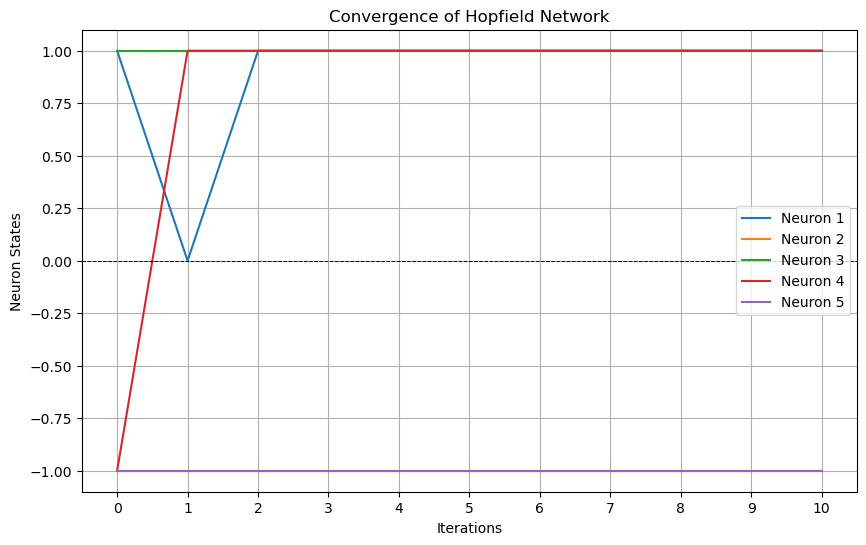

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Define prototype patterns (e.g., 3 patterns of length 5)
patterns = np.array([
    [1, -1, 1, 1, -1],
    [-1, 1, -1, -1, 1],
    [1, 1, -1, 1, 1]
])

# Function to calculate the weight matrix using Hebb's rule
def hebb_rule(patterns):
    num_patterns, num_neurons = patterns.shape
    W = np.zeros((num_neurons, num_neurons))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)  # No self-connections
    return W

# Function to compute the Lyapunov function
def lyapunov_function(W, a):
    return -0.5 * np.dot(a, np.dot(W, a))

# Function to simulate the Hopfield network
def hopfield_network(input_pattern, W, num_iterations=10):
    a = input_pattern.copy()
    states = [a.copy()]
    for _ in range(num_iterations):
        # Update rule: a = sign(W * a)
        a = np.sign(np.dot(W, a))
        states.append(a.copy())
    return states

# Calculate the weight matrix
W = hebb_rule(patterns)

# Input pattern (can be noisy version of the stored patterns)
input_pattern = np.array([1, -1, 1, -1, -1])  # An example input pattern

# Simulate the Hopfield network
states = hopfield_network(input_pattern, W)

# Convert states to a 2D array for plotting
states = np.array(states)

# Plotting the convergence of the Hopfield network
plt.figure(figsize=(10, 6))
for i in range(states.shape[1]):
    sns.lineplot(x=np.arange(states.shape[0]), y=states[:, i], label=f'Neuron {i+1}')
plt.title('Convergence of Hopfield Network')
plt.xlabel('Iterations')
plt.ylabel('Neuron States')
plt.xticks(np.arange(states.shape[0]))
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.show()


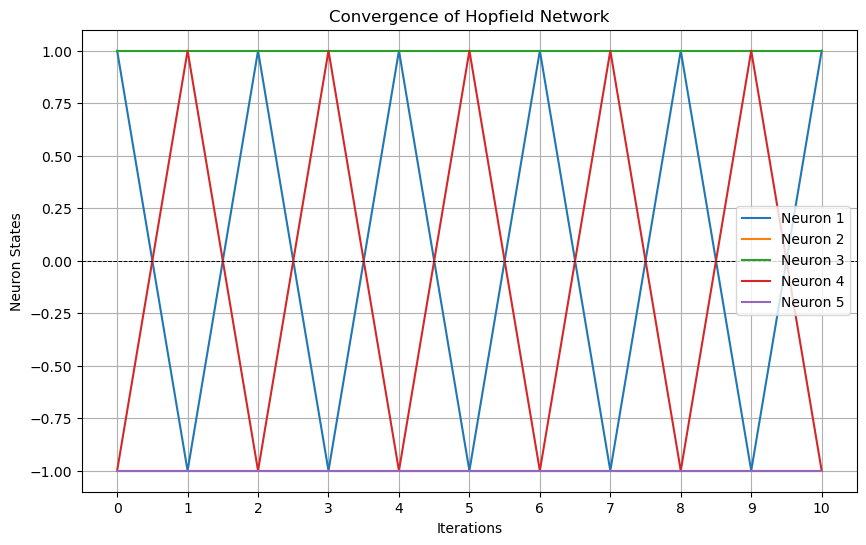

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
import random
random.seed(42)

# Define prototype patterns (e.g., 3 patterns of length 5)
patterns = [
    [1, -1, 1, 1, -1],
    [-1, 1, -1, -1, 1],
    [1, 1, -1, 1, 1]
]

# Function to calculate the weight matrix using Hebb's rule
def hebb_rule(patterns):
    num_neurons = len(patterns[0])
    W = [[0 for _ in range(num_neurons)] for _ in range(num_neurons)]
    
    for p in patterns:
        for i in range(num_neurons):
            for j in range(num_neurons):
                if i != j:  # No self-connections
                    W[i][j] += p[i] * p[j]
    return W

# Function to compute the Lyapunov function
def lyapunov_function(W, a):
    V = 0
    for i in range(len(a)):
        for j in range(len(a)):
            V -= 0.5 * a[i] * W[i][j] * a[j]
    return V

# Function to simulate the Hopfield network
def hopfield_network(input_pattern, W, num_iterations=10):
    a = input_pattern.copy()
    states = [a.copy()]
    
    for _ in range(num_iterations):
        new_a = [0] * len(a)
        for i in range(len(a)):
            # Update rule: a[i] = sign(sum(W[i][j] * a[j]))
            sum_input = 0
            for j in range(len(a)):
                sum_input += W[i][j] * a[j]
            new_a[i] = 1 if sum_input > 0 else -1
        a = new_a
        states.append(a.copy())
    
    return states

# Calculate the weight matrix
W = hebb_rule(patterns)

# Input pattern (can be noisy version of the stored patterns)
input_pattern = [1, -1, 1, -1, -1]  # An example input pattern

# Simulate the Hopfield network
states = hopfield_network(input_pattern, W)

# Plotting the convergence of the Hopfield network
plt.figure(figsize=(10, 6))
for i in range(len(states[0])):
    neuron_states = [state[i] for state in states]
    sns.lineplot(x=range(len(neuron_states)), y=neuron_states, label=f'Neuron {i+1}')

plt.title('Convergence of Hopfield Network')
plt.xlabel('Iterations')
plt.ylabel('Neuron States')
plt.xticks(range(len(states)))
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.show()


## Hopfield Network and Hebb Rule Analysis

Let's take a closer look at the operation of the Hopfield network when the Hebb rule is used to compute the weight matrix and the prototype patterns are orthogonal. The supervised Hebb rule is given by:

$$
W = \sum_{q=1}^{Q} p_q p_q^T
$$

If we apply the prototype vector $ p_j $ to the network, then:

$$
W p_j = \sum_{q=1}^{Q} p_q p_q^T p_j = p_j \sum_{q=1}^{Q} (p_q \cdot p_j) = S p_j
$$

where the second equality holds because the prototype patterns are orthogonal, and the third equality holds because each element of $ p_j $ is either 1 or -1. 

Thus, we have:

$$
W p_j = \lambda p_j
$$

Therefore, each prototype vector is an eigenvector of the weight matrix, and they have a common eigenvalue of $ \lambda = S $. The eigenspace $ X $ for the eigenvalue $ \lambda = S $ is given by:

$$
X = \text{span} \{ p_1, p_2, \ldots, p_Q \}
$$

This space contains all vectors that can be written as linear combinations of the prototype vectors. That is, any vector \( a \) that is a linear combination of the prototype vectors is an eigenvector:

$$
W a = W \left( \alpha_1 p_1 + \alpha_2 p_2 + \ldots + \alpha_Q p_Q \right) = \sum_{i=1}^{Q} \alpha_i W p_i = \sum_{i=1}^{Q} \alpha_i S p_i = S a
$$

The eigenspace for the eigenvalue $ \lambda = S $ is $ Q $-dimensional (assuming that the prototype vectors are independent). The entire space $ \mathbb{R}^S $ can be divided into two disjoint sets:

$$
\mathbb{R}^S = X \cup X^\perp
$$

where $ X^\perp $ is the orthogonal complement of $ X $. This means that for any vector $ a \in X^\perp $:

$$
\sum_{q=1}^{Q} (p_q \cdot a) = 0
$$

Thus, we have:

$$
W a = \sum_{q=1}^{Q} p_q p_q^T a = \sum_{q=1}^{Q} (p_q \cdot 0) = 0
$$

So $ X^\perp $ defines an eigenspace for the repeated eigenvalue $ \lambda = 0 $. 

To summarize, the weight matrix has two eigenvalues, $ S $ and $ 0 $. The eigenspace for the eigenvalue $ S $ is the space spanned by the prototype vectors. The eigenspace for the eigenvalue $ 0 $ is the orthogonal complement of the space spanned by the prototype vectors. 

Since the Hessian matrix for the high-gain Lyapunov function $ V $ is given by:

$$
\nabla^2 V = -W
$$

the eigenvalues for $ \nabla^2 V $ will be $ -S $ and $ 0 $. The high-gain Lyapunov function is a quadratic function, and therefore, the eigenvalues of the Hessian matrix determine its shape. Because the first eigenvalue is negative, $ V $ will have negative curvature in $ X $. Because the second eigenvalue is zero, $ V $ will have zero curvature in $ X^\perp $.

These results indicate that because $ V $ has negative curvature in $ X $, the trajectories of the Hopfield network will tend to fall into the corners of the hypercube $ \{ a : -1 < a_i < 1 \} $ that are contained in $ X $. 

If we compute the weight matrix using the Hebb rule, there will be at least two minima of the Lyapunov function for each prototype vector. If $ p_q $ is a prototype vector, then $ -p_q $ will also be in the space spanned by the prototype vectors, $ X $. Therefore, the negative of each prototype vector will be one of the corners of the hypercube $ \{ a : -1 < a_i < 1 \} $ that are contained in $ X $.

There will also be a number of other minima of the Lyapunov function that do not correspond to prototype patterns. The minima of $ V $ are in the corners of the hypercube $ \{ a : -1 < a_i < 1 \} $ that are contained in $ X $. These corners will include the prototype patterns, but they will also include some linear combinations of the prototype patterns. 

Those minima that are not prototype patterns are often referred to as spurious patterns. The objective of Hopfield network design is to minimize the number of spurious patterns and to make the basins of attraction for each of the prototype patterns as large as possible. A design method that is guaranteed to minimize the number of spurious patterns is described in [LiMi89].

To illustrate these principles, consider the connection matrix given by:

$$
W = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

Suppose that this had been designed using the Hebb rule with one prototype pattern:

$$
p_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

Then,

$$
W = p_1 p_1^T = \begin{pmatrix} 1 \\ 1 \end{pmatrix} \begin{pmatrix} 1 & 1 \end{pmatrix} = \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}
$$

Notice that \( W' = W - I = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \) corresponds to our original connection matrix.

The high-gain Lyapunov function is given by:

$$
V(a) = -\frac{1}{2} a^T W a = -\frac{1}{2} a^T \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} a
$$

The Hessian matrix for \( V(a) \) is:

$$
\nabla^2 V(a) = -W
$$

# Lyapunov Function and Eigenvalues in Hopfield Networks

The Hessian matrix for the Lyapunov function \( V(a) \) is given by:

$$
\nabla^2 V(a) = -W = \begin{pmatrix} -1 & -1 \\ -1 & -1 \end{pmatrix} 
$$

Its eigenvalues are:

$$
\lambda_1 = -S = -2, \quad \lambda_2 = 0 
$$

The corresponding eigenvectors are:

$$
z_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad z_2 = \begin{pmatrix} 1 \\ -1 \end{pmatrix} 
$$

The first eigenvector, corresponding to the eigenvalue \( -S \), represents the space spanned by the prototype vector:

$$
X = \{ a : a_1 = a_2 \} 
$$

The second eigenvector, corresponding to the eigenvalue \( 0 \), represents the orthogonal complement of the first eigenvector:

$$
X^\perp = \{ a : a_1 = -a_2 \} 
$$

The Lyapunov function is displayed in Figure 21.10. This surface has a straight ridge from the upper-left to the lower-right corner. This represents the zero curvature region of \( X \). 

Initial conditions to the left or to the right of the ridge will converge to the points:

$$
a = 1 \quad \text{or} \quad a = -1 
$$

respectively. Initial conditions exactly on this ridge will stabilize where they start. This situation is the same as that for our original example (see Figure 21.9), except that in that case, initial points on the sloping ridge converged to the origin instead of remaining where they started (see Figure 21.6). 

Initial points to the right or to the left of the ridge, in both systems, converge to the prototype design points. Thus, the convergence of our original system and the convergence of the system with zero diagonal elements are identical in every important aspect. We will investigate this further in the next section.

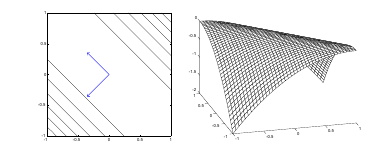

Fig.10 Example Lyapunov Function

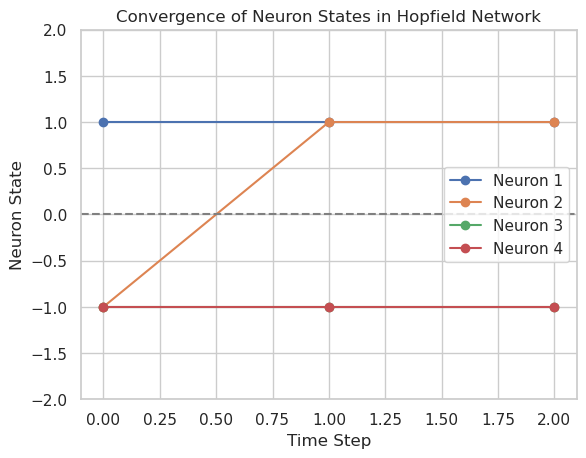

In [16]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = [[0 for _ in range(num_neurons)] for _ in range(num_neurons)]
    
    def train(self, patterns):
        for p in patterns:
            for i in range(self.num_neurons):
                for j in range(self.num_neurons):
                    if i != j:
                        self.weights[i][j] += p[i] * p[j]
    
    def update(self, state):
        new_state = state[:]
        for i in range(self.num_neurons):
            activation = sum(self.weights[i][j] * state[j] for j in range(self.num_neurons))
            new_state[i] = 1 if activation > 0 else -1
        return new_state
    
    def predict(self, input_pattern, max_iterations=10):
        state = input_pattern[:]
        history = [state[:]]  # Initialize history with the initial state
        
        for _ in range(max_iterations):
            state = self.update(state)
            history.append(state[:])
            if state == history[-2]:  # Stop if there is no change
                break
        
        return history

def plot_convergence(history):
    sns.set(style="whitegrid")
    
    # Prepare data for plotting
    time_steps = list(range(len(history)))
    neuron_states = list(zip(*history))
    
    # Create a plot for each neuron
    for i in range(len(neuron_states)):
        plt.plot(time_steps, neuron_states[i], marker='o', label=f'Neuron {i + 1}')

    plt.title('Convergence of Neuron States in Hopfield Network')
    plt.xlabel('Time Step')
    plt.ylabel('Neuron State')
    plt.ylim(-2, 2)  # Set limits to visualize states -1 and 1 clearly
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend()
    plt.show()

# Define prototype patterns
p1 = [1, 1, -1, -1]
p2 = [-1, -1, 1, 1]
patterns = [p1, p2]

# Create Hopfield Network and train
num_neurons = len(p1)
hopfield_net = HopfieldNetwork(num_neurons)
hopfield_net.train(patterns)

# Test with a noisy input pattern
noisy_input = [1, -1, -1, -1]  # A pattern close to p1
history = hopfield_net.predict(noisy_input)

# Plot the convergence
plot_convergence(history)


## Lyapunov Surface in Hopfield Networks

In many discussions of the Hopfield network, the diagonal elements of the weight matrix are set to zero. In this section, we will analyze the effect of this operation on the Lyapunov surface.

## Weight Matrix Modification

For the content-addressable memory network, all of the diagonal elements of the weight matrix will be equal to $ Q $ (the number of prototype patterns), since the elements of each $ p_q $ are $ \pm 1 $. Therefore, we can zero the diagonal by subtracting $ Q $ times the identity matrix:

$$
W' = W - QI
$$

## Effect on Lyapunov Function

Let's investigate how this change affects the form of the Lyapunov function. If we multiply this new weight matrix by one of the prototype vectors, we find:

$$
W'p_q = [W - QI]p_q = Sp_q - Qp_q = (S - Q)p_q
$$

Thus, $ (S - Q) $ is an eigenvalue of $ W' $, and the corresponding eigenspace is $ X $, the space spanned by the prototype vectors.

Next, if we multiply the new weight matrix by a vector from the orthogonal complement space, $ a \in X^\perp $, we have:

$$
W'a = [W - QI]a = 0 - Qa = -Qa
$$

Therefore, $ -Q $ is an eigenvalue of $ W' $, and the corresponding eigenspace is $ X^\perp $.

## Summary of Eigenvalues

To summarize, the eigenvectors of $ W' $ are the same as those of $ W $, but the eigenvalues are now $ (S - Q) $ and $ -Q $, instead of $ S $ and $ 0 $. Consequently, the eigenvalues of the Hessian matrix of the modified Lyapunov function, $ \nabla^2 V'(a) = -W' $, are:

$$
-\left(S - Q\right) \quad \text{and} \quad Q
$$

This implies that the energy surface will have:

- Negative curvature in $ X $
- Positive curvature in $ X^\perp $

In contrast, the original Lyapunov function had negative curvature in $ X $ and zero curvature in $ X^\perp $.

## System Performance Comparison

A comparison of Figures 21.9 and 21.10 demonstrates the effect on the Lyapunov function of setting the diagonal elements of the weight matrix to zero. In terms of system performance, the change has little effect.

If the initial condition of the Hopfield network falls anywhere off the line $ a_1 = -a_2 $, then, in either case, the output of the network will converge to one of the corners of the hypercube $ \{ a: -1 < a_i < 1 \} $, which consists of the two points $ a = (1, 1) $ and $ a = (-1, -1) $.

If the initial condition falls exactly on the line $ a_1 = -a_2 $:

- When the weight matrix $ W $ is used, the network output will remain constant.
- When the weight matrix \( W' \) is used, the network output will converge to the saddle point at the origin.

Neither of these results is desirable since the network output does not converge to a minimum of the Lyapunov function. The only case in which the network converges to a saddle point is when the initial condition falls exactly on the line \( a_1 = -a_2 \), which would be highly unlikely in practice.


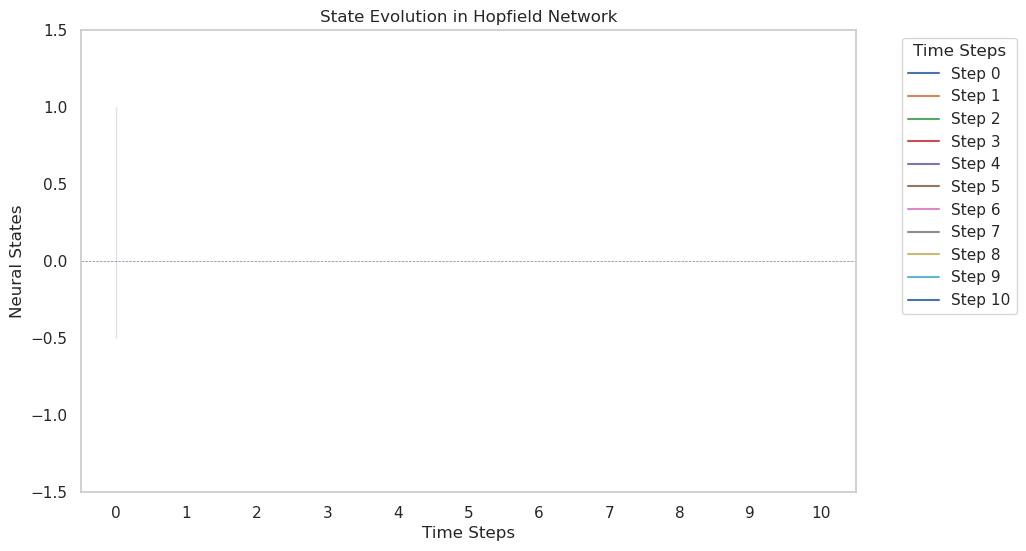

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to initialize the Hopfield network
def initialize_hopfield_network(patterns):
    num_patterns = len(patterns)
    num_neurons = len(patterns[0])
    W = [[0 for _ in range(num_neurons)] for _ in range(num_neurons)]

    # Create the weight matrix
    for p in patterns:
        for i in range(num_neurons):
            for j in range(num_neurons):
                W[i][j] += p[i] * p[j]

    # Set the diagonal elements to zero
    for i in range(num_neurons):
        W[i][i] = 0
    
    return W

# Function to modify the weight matrix
def modify_weight_matrix(W, Q):
    num_neurons = len(W)
    W_prime = [[W[i][j] - (Q if i == j else 0) for j in range(num_neurons)] for i in range(num_neurons)]
    return W_prime

# Function to run the Hopfield network
def hopfield_network(W, initial_state, steps=10):
    state = initial_state.copy()
    states = [state.copy()]
    
    for _ in range(steps):
        # Update each neuron based on the sign of the weighted sum
        new_state = state.copy()
        for i in range(len(state)):
            net_input = sum(W[i][j] * state[j] for j in range(len(state)))
            new_state[i] = 1 if net_input > 0 else -1
        states.append(new_state)
        state = new_state

    return states

# Function to visualize the states over time
def plot_states(states):
    plt.figure(figsize=(10, 6))
    for i, state in enumerate(states):
        sns.lineplot(x=[i]*len(state), y=state, label=f'Step {i}')
    plt.title('State Evolution in Hopfield Network')
    plt.xlabel('Time Steps')
    plt.ylabel('Neural States')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.ylim(-1.5, 1.5)
    plt.xticks(range(len(states)))
    plt.grid()
    plt.legend(title='Time Steps', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define prototype patterns (e.g., two patterns)
    patterns = [[1, -1, 1, -1],
                [-1, 1, -1, 1]]

    # Initialize the Hopfield network
    W = initialize_hopfield_network(patterns)
    
    # Modify the weight matrix
    Q = len(patterns)
    W_prime = modify_weight_matrix(W, Q)

    # Initial state (off the line a1 = -a2)
    initial_state = [1, -1, 1, 1]
    
    # Run the Hopfield network
    states = hopfield_network(W_prime, initial_state)

    # Plot the states over time
    plot_states(states)


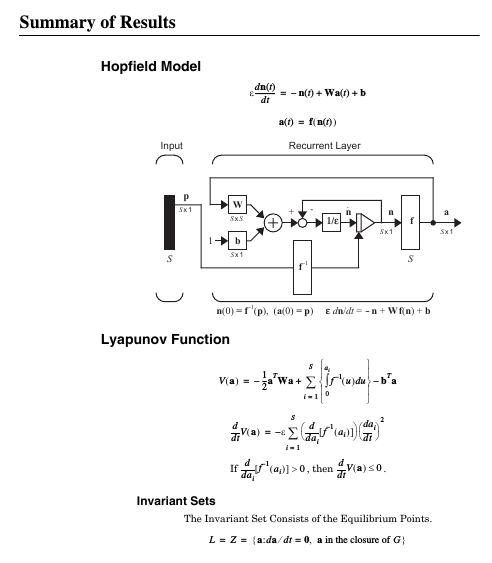

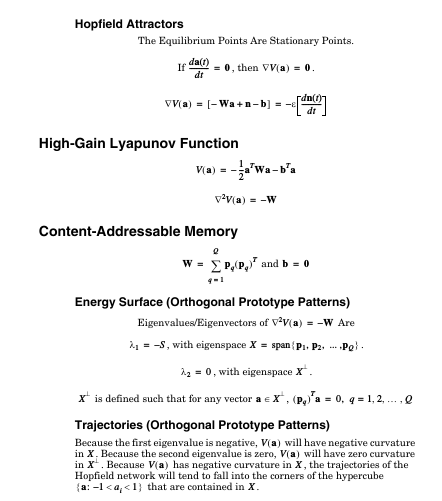

